# <center>Lab 4 - Gradient Descent | Linear Regression

---------------------------

Name: **KRISH GOYAL** <br>
Reg No: **21112015** <br>
Class: **4 BSC DS** <br>

---------------
    
<u>**Objectives**</u>  
- Implement Linear Regression with Gradient Descent.

- Use necessary visualisations, plots, and other relevant factors to prove that the model's loss is converging to the minima. Check whether the number of iterations (epochs) or learning rate change the way in which the algorithm is trained. Compare the trained model with any OLS based linear regression model and comment on your learnings.

- ADDITIONAL: Implement Multiple Linear Regression based on Gradient Descent. Once done, fit the Boston House Prices dataset using the user-defined functions that you created. Once done, compare it with any OLS based model, and provide your comments.

-----------------
    
<u>**Problem Statement**</u>  
- Implement Linear Regression with Gradient Descent.
    
-------------------
    
<u>**Methods**</u> 
- Importing Boston Dataset using **Sklearn.datasets**
- Understand the significance of **Gradiant Descent**
    
------------------
    
<u>**Observations**</u>
- Importing the Boston dataset from sklearn library .
- The coef_ is decreasing.
- The model is overfitting as the scattered values are overlapping on the graph.
- Current Loss deceasing and Bias are increasing and getting constant which means it's overfitting the model
- The Gradiant Descent function is converging over the losses in multiple linear regression
- The bias are converging from 0.6 to 0 which indicates good model as bias is getting low
- The array_of_losses is converging as it getting parallel.
    
------------------
 
<u>**Results**</u>
- The Boston Dataset model is overfitting while using Linear Regression with Gradiant Descent and the graph is converging in Multiple Linear Regression and diverging in Simple Linear Regression.
- The Bias present in Simple Linear Regression is more as compared to Multiple Regression 

------------------
 
<u>**Learnings & Reflection**</u>
- The changes in epoch reflects a huge change in current loss and bias.

------------------

<u>**References**</u> <br> 
1. [Pandas Documendation](https://pandas.pydata.org/)<br>

***************
    
[Github Link](https://github.com/Krishnaa-tech/ML-Projects.git)<br>
------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sps
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
  
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()

C:\Users\goyal\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

In [3]:
df['Price'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


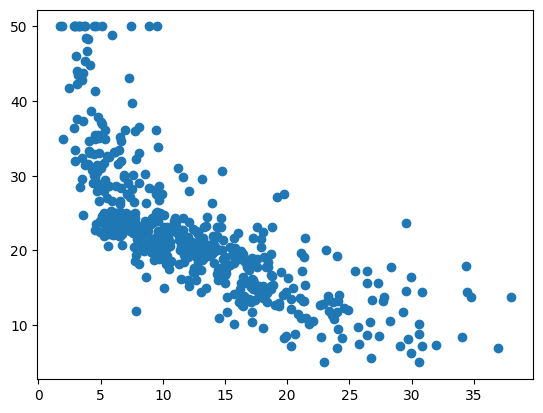

In [4]:
plt.scatter(df['LSTAT'], df['Price'])

**Observation** - *The model is overfitting as the scattered values are overlapping on the graph*

In [5]:
def part_der_J_b(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i])
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/n

In [6]:
def part_der_J_w(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i]) * X[i]
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/n

In [7]:
def y_cap(w, x, b):
    return w*x + b

In [8]:
def calculate_loss(n, w, X, b, Y):
    total_sum = 0
    for i in range(0, n):
        sum_of_an_iteration = (y_cap(w, X[i], b) - Y[i])**2
        total_sum = total_sum + sum_of_an_iteration
    return total_sum/(2*n)

In [9]:
X = MinMaxScaler().fit_transform(df[['LSTAT']])
Y = MinMaxScaler().fit_transform(df[['Price']])

In [10]:
alpha = 0.001
epoch = 1000
w = [0]
b = [0]

n = len(X)

array_of_losses = []
array_of_ws = []
array_of_bs = []

#print("X : {}, Y: {}". format(X, Y))
print("No of Data Points: {}".format(n))
print("------------")
print("Initial Parameters - W: {}, b = {}".format(w, b))
print("Hyper Parameters - alpha: {}, epochs: {}".format(alpha, epoch))

for epoch_num in range(0, epoch):
    loss = calculate_loss(n, w, X, b, Y)
    
    array_of_losses.append(loss[0])
    array_of_ws.append(w[0])
    array_of_bs.append(b[0])
  
    print("CURRENT LOSS: {}".format(float(loss)))
    
    print("W: {}, B: {}".format(w, b))
    
    w = w - alpha * part_der_J_w(n, w, X, b, Y)
    b = b - alpha * part_der_J_b(n, w, X, b, Y)

No of Data Points: 506
------------
Initial Parameters - W: [0], b = [0]
Hyper Parameters - alpha: 0.001, epochs: 1000
CURRENT LOSS: 0.09674539598887422
W: [0], B: [0]
CURRENT LOSS: 0.09658598462666289
W: [8.77852343e-05], B: [0.00038959]
CURRENT LOSS: 0.096426919674758
W: [0.00017544], B: [0.00077877]
CURRENT LOSS: 0.09626820037571936
W: [0.00026297], B: [0.00116753]
CURRENT LOSS: 0.09610982597376273
W: [0.00035037], B: [0.00155587]
CURRENT LOSS: 0.09595179571475816
W: [0.00043764], B: [0.0019438]
CURRENT LOSS: 0.09579410884622316
W: [0.00052478], B: [0.00233132]
CURRENT LOSS: 0.09563676461732214
W: [0.0006118], B: [0.00271842]
CURRENT LOSS: 0.09547976227886125
W: [0.00069868], B: [0.00310511]
CURRENT LOSS: 0.09532310108328497
W: [0.00078544], B: [0.00349138]
CURRENT LOSS: 0.09516678028467285
W: [0.00087207], B: [0.00387725]
CURRENT LOSS: 0.09501079913873567
W: [0.00095858], B: [0.0042627]
CURRENT LOSS: 0.09485515690281164
W: [0.00104495], B: [0.00464774]
CURRENT LOSS: 0.0946998528358

CURRENT LOSS: 0.07318935134018581
W: [0.01372199], B: [0.06319478]
CURRENT LOSS: 0.07308106395932416
W: [0.01378895], B: [0.06351704]
CURRENT LOSS: 0.07297301120864824
W: [0.0138558], B: [0.06383897]
CURRENT LOSS: 0.07286519257517766
W: [0.01392255], B: [0.06416055]
CURRENT LOSS: 0.07275760754705385
W: [0.01398919], B: [0.06448179]
CURRENT LOSS: 0.07265025561353804
W: [0.01405573], B: [0.06480269]
CURRENT LOSS: 0.0725431362650081
W: [0.01412216], B: [0.06512325]
CURRENT LOSS: 0.0724362489929563
W: [0.01418849], B: [0.06544347]
CURRENT LOSS: 0.07232959328998749
W: [0.01425471], B: [0.06576335]
CURRENT LOSS: 0.07222316864981573
W: [0.01432082], B: [0.06608288]
CURRENT LOSS: 0.07211697456726258
W: [0.01438683], B: [0.06640208]
CURRENT LOSS: 0.07201101053825433
W: [0.01445274], B: [0.06672094]
CURRENT LOSS: 0.07190527605981958
W: [0.01451854], B: [0.06703946]
CURRENT LOSS: 0.07179977063008683
W: [0.01458424], B: [0.06735765]
CURRENT LOSS: 0.07169449374828257
W: [0.01464983], B: [0.06767549

CURRENT LOSS: 0.06042028302389277
W: [0.02190336], B: [0.10402774]
CURRENT LOSS: 0.06033962459329629
W: [0.02195695], B: [0.10430672]
CURRENT LOSS: 0.06025914038943353
W: [0.02201045], B: [0.10458539]
CURRENT LOSS: 0.06017883003142468
W: [0.02206386], B: [0.10486377]
CURRENT LOSS: 0.0600986931392226
W: [0.02211718], B: [0.10514186]
CURRENT LOSS: 0.060018729333611576
W: [0.02217041], B: [0.10541966]
CURRENT LOSS: 0.059938938236204956
W: [0.02222355], B: [0.10569716]
CURRENT LOSS: 0.05985931946944354
W: [0.02227659], B: [0.10597436]
CURRENT LOSS: 0.05977987265659417
W: [0.02232955], B: [0.10625128]
CURRENT LOSS: 0.059700597421747374
W: [0.02238242], B: [0.1065279]
CURRENT LOSS: 0.05962149338981591
W: [0.02243519], B: [0.10680422]
CURRENT LOSS: 0.05954256018653263
W: [0.02248788], B: [0.10708026]
CURRENT LOSS: 0.059463797438449005
W: [0.02254047], B: [0.107356]
CURRENT LOSS: 0.059385204772933284
W: [0.02259298], B: [0.10763146]
CURRENT LOSS: 0.05930678181816859
W: [0.0226454], B: [0.10790

CURRENT LOSS: 0.04870790925900682
W: [0.02994123], B: [0.14839313]
CURRENT LOSS: 0.04865248994760808
W: [0.02998041], B: [0.14862532]
CURRENT LOSS: 0.048597189691557505
W: [0.03001951], B: [0.14885727]
CURRENT LOSS: 0.04854200823063262
W: [0.03005854], B: [0.14908897]
CURRENT LOSS: 0.04848694530518001
W: [0.03009749], B: [0.14932042]
CURRENT LOSS: 0.04843200065611422
W: [0.03013637], B: [0.14955164]
CURRENT LOSS: 0.04837717402491613
W: [0.03017517], B: [0.14978261]
CURRENT LOSS: 0.048322465153632206
W: [0.0302139], B: [0.15001334]
CURRENT LOSS: 0.048267873784873114
W: [0.03025255], B: [0.15024382]
CURRENT LOSS: 0.04821339966181236
W: [0.03029113], B: [0.15047407]
CURRENT LOSS: 0.048159042528184835
W: [0.03032964], B: [0.15070407]
CURRENT LOSS: 0.04810480212828636
W: [0.03036807], B: [0.15093383]
CURRENT LOSS: 0.0480506782069716
W: [0.03040643], B: [0.15116335]
CURRENT LOSS: 0.04799667050965329
W: [0.03044471], B: [0.15139263]
CURRENT LOSS: 0.047942778782301014
W: [0.03048292], B: [0.15

CURRENT LOSS: 0.04237277043452224
W: [0.03446383], B: [0.17682665]
CURRENT LOSS: 0.0423309261419043
W: [0.03449385], B: [0.17702905]
CURRENT LOSS: 0.0422891712358187
W: [0.03452381], B: [0.17723123]
CURRENT LOSS: 0.042247505520927243
W: [0.0345537], B: [0.1774332]
CURRENT LOSS: 0.04220592880231872
W: [0.03458353], B: [0.17763496]
CURRENT LOSS: 0.04216444088550823
W: [0.03461329], B: [0.17783651]
CURRENT LOSS: 0.04212304157643604
W: [0.03464299], B: [0.17803785]
CURRENT LOSS: 0.04208173068146718
W: [0.03467262], B: [0.17823898]
CURRENT LOSS: 0.042040508007389864
W: [0.03470219], B: [0.1784399]
CURRENT LOSS: 0.0419993733614148
W: [0.03473169], B: [0.17864061]
CURRENT LOSS: 0.04195832655117461
W: [0.03476113], B: [0.17884111]
CURRENT LOSS: 0.04191736738472226
W: [0.03479051], B: [0.1790414]
CURRENT LOSS: 0.04187649567053081
W: [0.03481982], B: [0.17924149]
CURRENT LOSS: 0.041835711217491967
W: [0.03484907], B: [0.17944136]
CURRENT LOSS: 0.04179501383491544
W: [0.03487825], B: [0.17964102]

CURRENT LOSS: 0.037490757237992015
W: [0.03793575], B: [0.20215092]
CURRENT LOSS: 0.03745930623091433
W: [0.03795769], B: [0.20232695]
CURRENT LOSS: 0.03742792190025037
W: [0.03797957], B: [0.20250279]
CURRENT LOSS: 0.03739660410032726
W: [0.0380014], B: [0.20267845]
CURRENT LOSS: 0.03736535268579086
W: [0.03802317], B: [0.20285393]
CURRENT LOSS: 0.03733416751160463
W: [0.03804488], B: [0.20302923]
CURRENT LOSS: 0.03730304843304953
W: [0.03806654], B: [0.20320435]
CURRENT LOSS: 0.03727199530572272
W: [0.03808815], B: [0.20337928]
CURRENT LOSS: 0.03724100798553728
W: [0.0381097], B: [0.20355403]
CURRENT LOSS: 0.03721008632872156
W: [0.03813119], B: [0.2037286]
CURRENT LOSS: 0.037179230191818034
W: [0.03815263], B: [0.20390299]
CURRENT LOSS: 0.03714843943168315
W: [0.03817401], B: [0.2040772]
CURRENT LOSS: 0.037117713905486203
W: [0.03819534], B: [0.20425123]
CURRENT LOSS: 0.037087053470708925
W: [0.03821661], B: [0.20442508]
CURRENT LOSS: 0.037056457985144814
W: [0.03823783], B: [0.2045

CURRENT LOSS: 0.034032766937603924
W: [0.04026401], B: [0.2228002]
CURRENT LOSS: 0.03400861633524149
W: [0.04027943], B: [0.22295487]
CURRENT LOSS: 0.033984516461784
W: [0.04029479], B: [0.22310939]
CURRENT LOSS: 0.03396046720643445
W: [0.04031011], B: [0.22326375]
CURRENT LOSS: 0.0339364684586381
W: [0.04032538], B: [0.22341795]
CURRENT LOSS: 0.03391252010808219
W: [0.04034059], B: [0.22357199]
CURRENT LOSS: 0.0338886220446949
W: [0.04035576], B: [0.22372587]
CURRENT LOSS: 0.03386477415864539
W: [0.04037089], B: [0.2238796]
CURRENT LOSS: 0.033840976340342985
W: [0.04038596], B: [0.22403316]
CURRENT LOSS: 0.033817228480436445
W: [0.04040099], B: [0.22418657]
CURRENT LOSS: 0.03379353046981384
W: [0.04041596], B: [0.22433982]
CURRENT LOSS: 0.03376988219960196
W: [0.04043089], B: [0.22449291]
CURRENT LOSS: 0.033746283561165435
W: [0.04044577], B: [0.22464584]
CURRENT LOSS: 0.03372273444610672
W: [0.04046061], B: [0.22479862]
CURRENT LOSS: 0.03369923474626518
W: [0.04047539], B: [0.2249512

**Observation** - *Current Loss deceasing and Bias are increasing and getting constant which means it's overfitting the model* 

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X,Y)
print(lr.intercept_)  # Bias 
print(lr.coef_)

[0.6202279]
[[-0.76510641]]


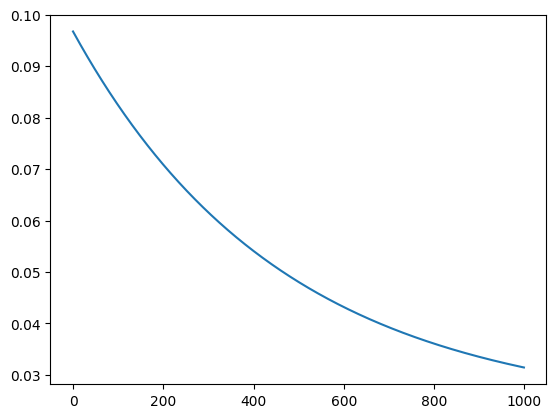

In [13]:
plt.plot(array_of_losses)

**Observation** - *The array_of_losses is converging as it getting parallel.*

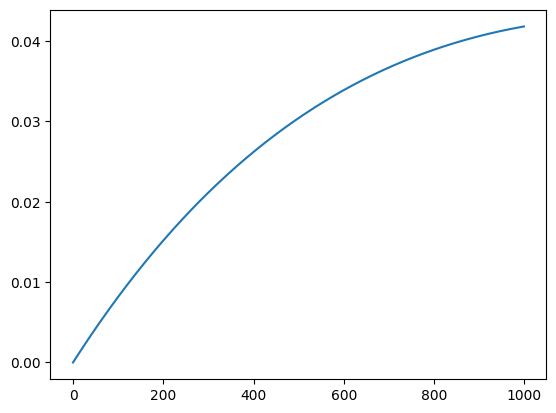

In [14]:
plt.plot(array_of_ws)

**Observation** - *The Gradiant Descent function is diverging over the losses in simple linear regression*

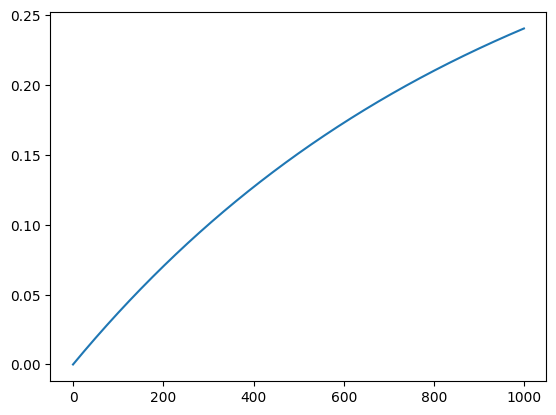

In [15]:
plt.plot(array_of_bs)

**Observation** - *The bias are converging from 0.6 to 0 which indicates good model as bias is getting low*

In [16]:
# Input Data
X = boston.data
  
# Output Data
Y = boston.target

**Observation** - *Declaring the X and Y variables*

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform =sc.fit_transform(X)
X_transform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [18]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i] - y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i] - y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i] - y_predicted[i])
    return (2/n) * s
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 1000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    return weight_vector,intercept

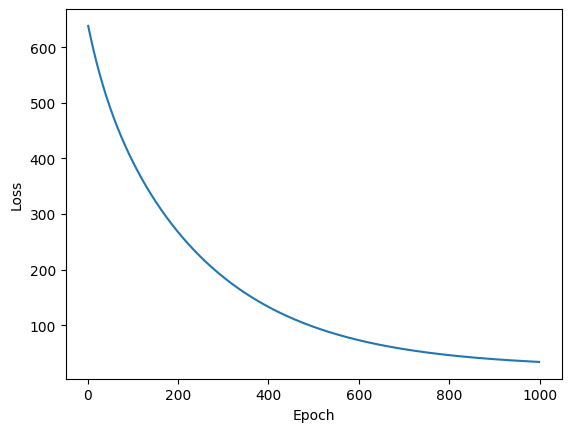

In [19]:
w,b = gradient_descent(X_transform,Y)

**Observation** - *The Gradiant Descent function is converging over the losses in multiple linear regression*

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_transform,Y)
print(lr.intercept_)  # Bias 
print(lr.coef_)

22.532806324110684
[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]


In [22]:
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(Y,X_transform).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.082
Method:                 Least Squares   F-statistic:                              4.477
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                    3.14e-07
Time:                        23:11:16   Log-Likelihood:                         -2304.8
No. Observations:                 506   AIC:                                      4636.
Df Residuals:                     493   BIC:                                      4691.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------